# TAXI FARE PREDICTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
df=pd.read_csv('Downloads/Taxi Fare Prediction/Dataset/TaxiFare.csv')
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
df.shape

(50000, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 2.7+ MB


In [7]:
df.amount.value_counts()

6.50     2468
4.50     2104
8.50     1929
6.10     1441
5.30     1440
         ... 
55.30       1
34.44       1
52.40       1
25.40       1
28.54       1
Name: amount, Length: 703, dtype: int64

**Considering unique_id**

In [8]:
df.unique_id.value_counts()

26:00.0    457
33:00.0    439
11:00.0    436
32:00.0    429
20:00.0    424
          ... 
56:16.0      1
16:50.0      1
49:14.0      1
30:15.0      1
04:28.0      1
Name: unique_id, Length: 3597, dtype: int64

In [9]:
df['unique_id']=pd.to_numeric(df.unique_id,errors='coerce')

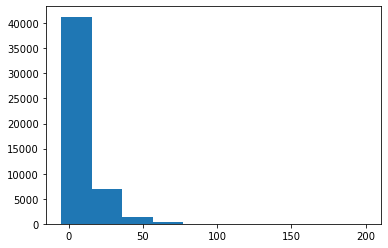

In [10]:
plt.hist(df.amount)
plt.show()

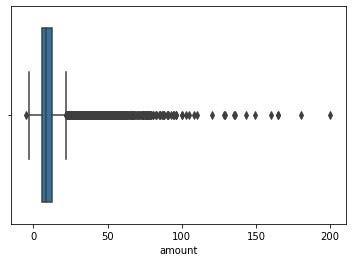

In [11]:
sns.boxplot(df.amount)
plt.show()

In [12]:
df['unique_id']=df['unique_id'].astype('O')

In [13]:
numerical=df.select_dtypes(include=np.number)

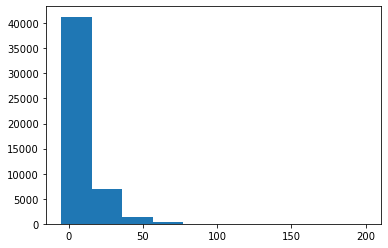

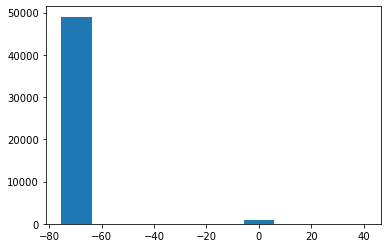

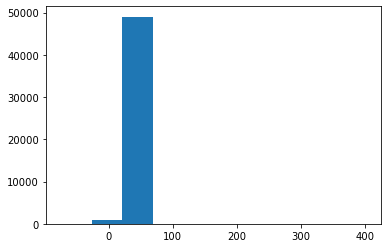

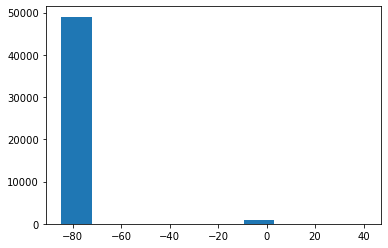

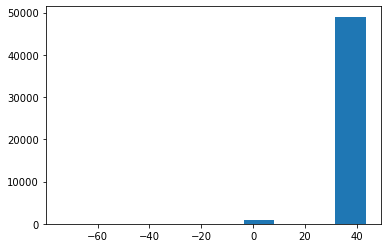

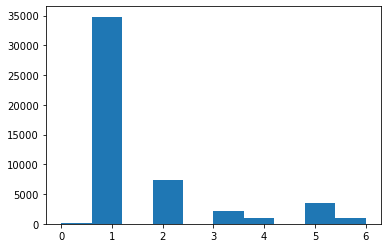

In [14]:
for i in numerical:
    plt.hist(df[i])
    plt.show()

In [15]:
IQR=df.amount.quantile(0.75)-df.amount.quantile(0.25)
IQR

6.5

In [16]:
num=df.select_dtypes(include=np.number)
num.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1


In [17]:
def distance(lat1, lon1, lat2, lon2):
  p = 0.017453292519943295 # Pi/180
  a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p))/2
  return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

df['distance_travelled'] = distance(df.latitude_of_pickup, df.longitude_of_pickup,
                                    df.latitude_of_dropoff, df.longitude_of_dropoff)
df.distance_travelled.head()

0    0.640487
1    5.250670
2    0.863411
3    1.739386
4    1.242218
Name: distance_travelled, dtype: float64

In [18]:
df.date_time_of_pickup.describe()

count                       50000
unique                      49555
top       2011-02-11 13:19:00 UTC
freq                            3
Name: date_time_of_pickup, dtype: object

In [19]:
df.date_time_of_pickup=pd.to_datetime(df.date_time_of_pickup)

In [20]:
df.date_time_of_pickup.head()

0   2009-06-15 17:26:21+00:00
1   2010-01-05 16:52:16+00:00
2   2011-08-18 00:35:00+00:00
3   2012-04-21 04:30:42+00:00
4   2010-03-09 07:51:00+00:00
Name: date_time_of_pickup, dtype: datetime64[ns, UTC]

In [21]:
df['year']=df['date_time_of_pickup'].dt.year

In [22]:
df['month']=df['date_time_of_pickup'].dt.month_name()

In [23]:
df['day']=df['date_time_of_pickup'].dt.day_name()

In [24]:
df['hour']=df['date_time_of_pickup'].dt.hour

In [25]:
df['date']=df['date_time_of_pickup'].dt.date

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   unique_id             0 non-null      object             
 1   amount                50000 non-null  float64            
 2   date_time_of_pickup   50000 non-null  datetime64[ns, UTC]
 3   longitude_of_pickup   50000 non-null  float64            
 4   latitude_of_pickup    50000 non-null  float64            
 5   longitude_of_dropoff  50000 non-null  float64            
 6   latitude_of_dropoff   50000 non-null  float64            
 7   no_of_passenger       50000 non-null  int64              
 8   distance_travelled    50000 non-null  float64            
 9   year                  50000 non-null  int64              
 10  month                 50000 non-null  object             
 11  day                   50000 non-null  object             
 12  hour

In [27]:
df.groupby('year')

<AxesSubplot:xlabel='year', ylabel='count'>

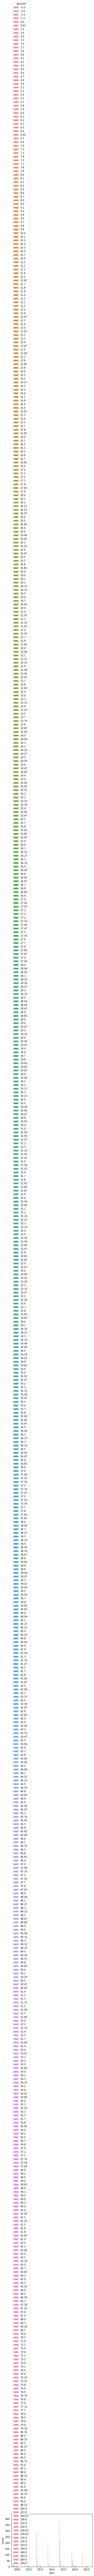

In [28]:
sns.countplot(df.year,hue=df['amount'],data=df)

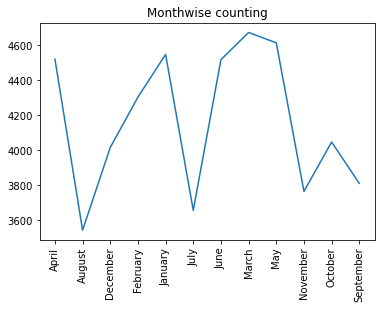

In [29]:
plt.plot(df.groupby('month')['amount'].count())
plt.xticks(rotation=90)
plt.title("Monthwise counting")
plt.show()

In [30]:
#Creating dict file
day={'Sunday':1,'Monday':2, 'Tuesday':3, 'Wednesday':4, 'Thursday':5, 
       'Friday':6, 'Saturday':7 }

#Converting weekdays names into numbers
df.day = [day[item] for item in df.day]
df.day.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   unique_id             0 non-null      object             
 1   amount                50000 non-null  float64            
 2   date_time_of_pickup   50000 non-null  datetime64[ns, UTC]
 3   longitude_of_pickup   50000 non-null  float64            
 4   latitude_of_pickup    50000 non-null  float64            
 5   longitude_of_dropoff  50000 non-null  float64            
 6   latitude_of_dropoff   50000 non-null  float64            
 7   no_of_passenger       50000 non-null  int64              
 8   distance_travelled    50000 non-null  float64            
 9   year                  50000 non-null  int64              
 10  month                 50000 non-null  object             
 11  day                   50000 non-null  int64              
 12  hour

In [31]:
#Creating dict file
month = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5,
         'June':6, 'July':7, 'August':8, 'September':9, 'October':10,
         'November':11, 'December':12}
#Converting month names to numbers
df.month = [month[item] for item in df.month]
print(df.month)
df.info()

0         6
1         1
2         8
3         4
4         3
         ..
49995     6
49996     6
49997     1
49998    11
49999     1
Name: month, Length: 50000, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   unique_id             0 non-null      object             
 1   amount                50000 non-null  float64            
 2   date_time_of_pickup   50000 non-null  datetime64[ns, UTC]
 3   longitude_of_pickup   50000 non-null  float64            
 4   latitude_of_pickup    50000 non-null  float64            
 5   longitude_of_dropoff  50000 non-null  float64            
 6   latitude_of_dropoff   50000 non-null  float64            
 7   no_of_passenger       50000 non-null  int64              
 8   distance_travelled    50000 non-null  float64            
 9   year                

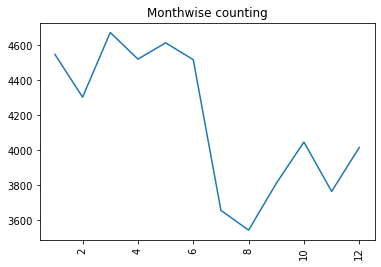

In [32]:
plt.plot(df.groupby('month')['amount'].count())
plt.xticks(rotation=90)
plt.title("Monthwise counting")
plt.show()

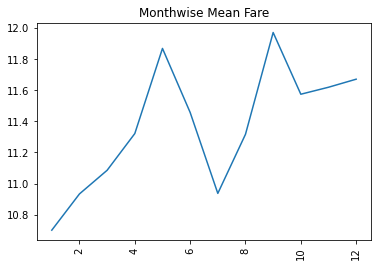

In [33]:
plt.plot(df.groupby('month')['amount'].mean())
plt.xticks(rotation=90)
plt.title("Monthwise Mean Fare")
plt.show()

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
df=df.drop(['date'],axis=1)

In [36]:
df.info()
x = df.iloc[:,3:13] 
x.info()
y = df.iloc[:,1]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   unique_id             0 non-null      object             
 1   amount                50000 non-null  float64            
 2   date_time_of_pickup   50000 non-null  datetime64[ns, UTC]
 3   longitude_of_pickup   50000 non-null  float64            
 4   latitude_of_pickup    50000 non-null  float64            
 5   longitude_of_dropoff  50000 non-null  float64            
 6   latitude_of_dropoff   50000 non-null  float64            
 7   no_of_passenger       50000 non-null  int64              
 8   distance_travelled    50000 non-null  float64            
 9   year                  50000 non-null  int64              
 10  month                 50000 non-null  int64              
 11  day                   50000 non-null  int64              
 12  hour

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=123)

In [41]:
y_pred = tf_clf.predict(x_test)

In [40]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
clf = tree.DecisionTreeRegressor()
tf_clf = clf.fit(x_train, y_train)

In [42]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(mse)
print(RMSE) 

5.73993293224465


In [43]:
len(y_test)
obs_No = list(range(1, 15001))
x = obs_No

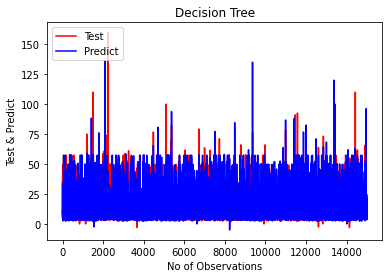

In [47]:
plt.plot(x, y_pred, 'r')
plt.plot(x, y_test, 'b')

plt.xlabel('No of Observations')
plt.ylabel('Test & Predict')
plt.title('Decision Tree')
plt.legend(labels= ('Test', 'Predict'), loc= 'upper left')
plt.show()

In [48]:
rfr = RandomForestRegressor(n_estimators = 50) 
tf_rfr = rfr.fit(x_train, y_train)
tf_rfr

RandomForestRegressor(n_estimators=50)

In [49]:
y_pred = tf_rfr.predict(x_test)

In [50]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(mse)
print(RMSE)

4.182106015556836


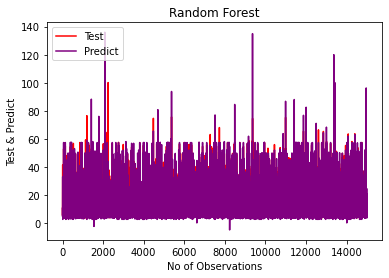

In [51]:
plt.plot(x, y_pred, 'r')
plt.plot(x, y_test, 'purple')
plt.xlabel('No of Observations')
plt.ylabel('Test & Predict')
plt.title('Random Forest')
plt.legend(labels= ('Test', 'Predict'), loc= 'upper left')
plt.show()